In [326]:
library(tidyverse)
library(AER)
library(MASS)
library(broom)
library(nlme)
library(gmodels)

<H1><center> Modelos lineales: cómo aprender estadística </center></H1>

<H3><center> Original de: Jonas Kristoffer Lindeløv </center></H3>
<H3><center> Modificado y traducido por: Miguel Angel Núñez Ochoa </center></H3>


![cover](https://prod-discovery.edx-cdn.org/media/course/image/2102f79d-9a44-41e9-9d92-884bec46dc65-89aac9d39cd1.small.jpg)


<H1><center>¿ Quién de ustedes ya ha llevado alguna clase de estadística ?</center></H1>

---
---
---

Un problema común cuando nos enseñan matemáticas (sobretodo estadística) es que en muchas ocasiones, terminamos memorizando fórmulas muchas formulas y sustituyendo valores, sin razonar qué es lo que significan las matemáticas que estamos utilizando, por ejemplo ¿ Ustedes sabían que muchos test estadísticos son **regresiones lineales** ? , si la respuesta es no, pues en este taller vamos a visitar la teoría de la regresión lineal y a partir de ahí visitaremos varios test estadísticos desde el framework de las regresiones lineales.

Entonces, en vez de hacerles aprender mil formulas, vamos a entender que que significa cada test, y al entender cada uno como un caso especial de la regresión lineal, será más fácil aprender los nombres de los casos específicos, que las  formulas.

---
---
---

<H1><center> REFRESHER:</center></H1>
<H1><center>¿ Alguien reconoce las siguientes formulas ?</center></H1>

$$
\frac{1}{n} \cdot \sum_{i=1}^n x_i
$$

$$
\frac{1}{n-1} \cdot\sum_{i=1}^n (x_i-\mu)^2
$$

* ¿ Cuál es la intuición detrás de ellas ?

---
---
---

<H1><center>Regresión Lineal</center></H1>

La idea general de la regresión lineal es que queremos capturar la relación entre una variable dependiente $Y$ con una o más variables explicatorias $X_1,X_2,...,X_n$

Para comenzar con un ejemplo sencillo, consideraremos la relación entre calificaciones (Score) y la proporción promedio de alumnos por maestro (Student Teacher Ratio *STR*) de algunas escuelas ficticias (cuando en la regresión lineal solo existe una variable explicatoria, generalmente se le conoce como *regresión lineal simple*), dicha relación la queremos ajustar a una linea recta, formalmente:

$$
Y = a + b \cdot X 
$$

De tal modo que queremos generar el siguiente  modelo:

$$
Score \sim \beta_0 + \beta_1 \cdot STR + u_i
$$

In [30]:
Score <- c(680, 640, 670, 660, 630, 660, 635) 
STR <- c(15, 17, 19, 20, 22, 23.5, 25)
Schools <- data.frame( Score = Score,
                      STR = STR)
head(Schools)

Score,STR
680,15.0
640,17.0
670,19.0
660,20.0
630,22.0
660,23.5


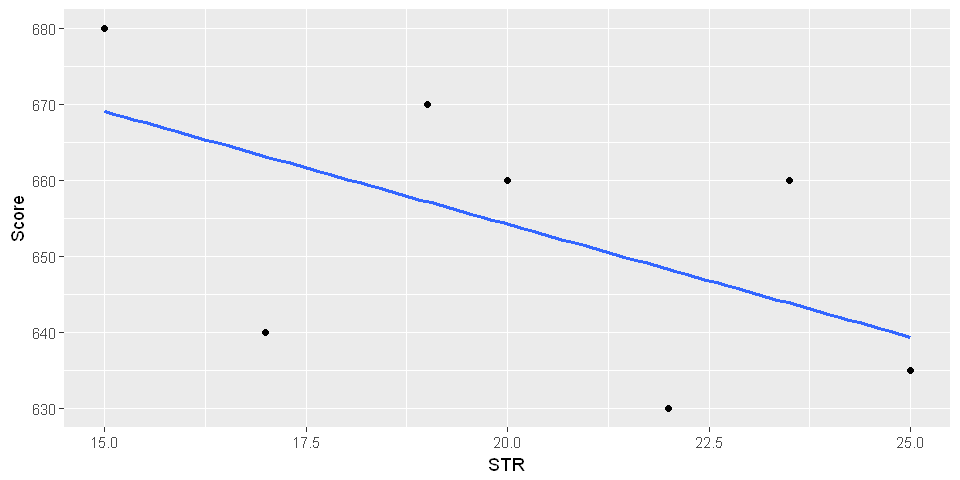

In [20]:
options(repr.plot.width=8, repr.plot.height=4) # controla tamaño de plot 
ggplot(Schools, aes(y = Score, x = STR)) + geom_point() + geom_smooth(method = lm, se = F)

Ahora lo haremos con datos reales de escuela de los distritos de california en EUA y veremos cómo estimar, dichos coeficientes para generar la recta:

In [71]:
data(CASchools)

In [25]:
# TODO:
# Describir cuantas observaciones y cuantas variables tiene el Dataset
# Calcular el STR y agregarlo al dataset STR = alumnos / profesores
# Calcule el Score como el promedio de la calificación de lectura y matemáticas
# Genere los histogramas tanto de Score como de STR. HINT : geom_hist()
# Calcule la media y sd de Score y STR guardarla en una variable tipo avg_STR o sd_STR y reportarla
# Reportar la correlación entre Score y STR
# Graficar la regresión lineal entre Score y STR HINT: acabamos de ver como

<H1><center> ESTIMADOR OLS </center></H1>

El estimador de mínimos cuadrados ordinarios (OLS) trata de estimar los coeficientes $\beta_0$ y $\beta_1$ haciendo pasar la recta lo más *cerca* posible de todos los puntos, dicha distancia está medida por el cuadrado de los errores:

$$
\sum^n_{i = 1} (Y_i - \beta_0 - \beta_1 X_i)^2
$$

Por lo tanto necesitamos encontrar $\beta_0$ y $\beta_1$ que:

* Minimicen
* Maximicen

La función de arriba.

---
---
---

Dicha optimización tiene la siguiente solución cerrada (closed-form solution: buscar en wiki si tienen curiosidad):

$$
\hat{\beta_1}  = \frac{ \sum_{i = 1}^n (X_i - \overline{X})(Y_i - \overline{Y}) } { \sum_{i=1}^n (X_i - \overline{X})^2} 
$$

$$
\hat{\beta_0} =  \overline{Y} - \hat{\beta_1} \overline{X}
$$
---
---
---

In [26]:
# TODO
# Obtener con las formulas dadas B1 y B2 para la regresión Score ~ STR

Por suerte R tiene una función que calcula dicha regresión de forma automática más algunos diagnósticos, dicha función es **lm(Y~X, data = data)**

In [27]:
# TODO
# sustituir los valores necesarios para obtener la regresión Score ~ STR y asignarlos a la variable mdl
# obtener un resumen de dicho modelo a través de la función summary() y asignarla a mdl_smry

<H1><center> ¿ Qué tan bueno es nuestro modelo? </center></H1>

Es la pregunta natual después de generar cualquier modelo, y para el caso de los modelos lineales tenemos dos mediciones que nos sirven de diagnóstico:

* Coeficiente de determinación: $R^2$
* Error estándar de la regresión: $RSE$

<H3>Coeficiente de detérminación</H3>

Describe que tanta varianza de la variable dependiente (Score) explica la variable independiente (STR)

Y se puede calcular de la siguiente forma:

$$
\begin{align}
  R^2 & = \frac{ESS}{TSS} \\
  donde: \\
  ESS & =  \sum_{i = 1}^n \left( \hat{Y_i} - \overline{Y} \right)^2,   \\
  TSS & =  \sum_{i = 1}^n \left( Y_i - \overline{Y} \right)^2,   \\
\end{align}
$$

Pero dado que $ TSS = ESS + SSR $ podemos reescribir la expresión de $R^2$ como:

$$
\begin{align}
R^2 = 1- \frac{SSR}{TSS} \\
SSR = \sum_{i=1}^n \hat{u}_i^2
\end{align}
$$

Es decir el coeficiente de determinación es una relación entre la suma cuadrada de los residuos y la suma cuadrata total (es decir, que tanto efectivamente explicamos satisfactoriamente $Y$ en relación a $X$, es fácil observar que para que $R^2 = 1$ necesitariamos no cometer errores $(SSR = 0)$ o en caso contrario  $R^2 = 0$ sería resultado de no poder explicar nada $Y$ con $X$ es decir $ESS = 0$

In [ ]:
# TODO calcular el coeficiente de determinación
SSR <- sum(mdl_smry$residuals^2) # Para poder correr esta linea tienen que haber generado y asignado el resumen del modelo


### Error estándar de la regresión (RSE)

Ésta medición nos ayuda a describir en promedio que tanto está separada una predicción ( la recta ) de la variable dependiente ( Score ) 

y se puede calcular de la siguiente forma:

$$
RSE = \frac{SSR}{n - 2}
$$

In [29]:
# TODO calcular RSE 
# Hint: nrows() cuenta el número de filas del dataset

<H1><center> Supuestos de  OLS </center></H1>

Basicamente tenemos que cumplir con 3 supuestos:

* No existen desviaciones sistemáticas entre las observaciones y la recta lo que se cumpleo si: $E(u_i|X_i) = 0$
![Error_sistemático](https://www.econometrics-with-r.org/ITER_files/figure-html/unnamed-chunk-161-1.png)
* Las observaciones de la $Y_i$ deben ser independientes entre ellas
* Los outliers (valores atípicos) son poco probables
![outlier](https://www.econometrics-with-r.org/ITER_files/figure-html/unnamed-chunk-163-1.png)

<h1><center>Muchos Test estadísticos son regresiones lineales!</center></h1>

## To do: ¿ Cuál es la diferencia entre un test paramétrico y uno no-parametrico?

### Correlación: Pearson y de Spearman

La correlación es una medida del grado de relación de dos variables siempre y cuando ambas sean cuantitativas y continuas, la correlación de **pearson** está descrita de la siguiente forma:

![pearson](https://wikimedia.org/api/rest_v1/media/math/render/svg/eab9032a258877eadedca9a7ff2902c2eb615d06)

Pero en vez de verla como una formula separada la calcularemos como:

$$
Y \sim X
$$

Donde:

$\beta_1$: coeficiente de correlación de pearson

**Siempre y cuando $Y$ y $X$ tengan la misma desviación estandar**

In [72]:
cor.test(CASchools$Scores,CASchools$STR, method = "pearson") # Función hecha
tidy(summary(lm(CASchools$Scores ~ CASchools$STR))) # Modelo lineal equivalente: y = Beta0 + Beta1*x
tidy(summary(lm(scale(CASchools$Scores) ~  scale(CASchools$STR)))) # Sobre variables estandarizadas para recuperar Pearson por completo


	Pearson's product-moment correlation

data:  CASchools$Scores and CASchools$STR
t = -4.7513, df = 418, p-value = 2.783e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3152213 -0.1335696
sample estimates:
       cor 
-0.2263627 


term,estimate,std.error,statistic,p.value
(Intercept),698.932949,9.4674911,73.824516,6.569846e-242
CASchools$STR,-2.279808,0.4798255,-4.751327,2.783308e-06


term,estimate,std.error,statistic,p.value
(Intercept),6.543795e-16,0.04758525,1.375173e-14,1.000000e+00
scale(CASchools$STR),-2.263627e-01,0.04764200,-4.751327e+00,2.783308e-06


Una nota sobre la aproximación lineal del coeficiente de pearson, es que los p-values son una aproximación apropiada para $n>10$ y casi perfecta para $n>20$

La versión no paramétrica del coeficiente de correlación de pearson, es la correlación de **spearman** la cúal evalúa la relación monótona entre dos variables continuas u ordinales.

Basicamente, la mayoría de los test estadísticos no-paramétricos, son exactamente los mismos que los paramétricos, pero a los datos les efectuamos una transformación llamada **rank**. 

### Rank transformation

la transformación *rango* es simplemente tomar una lista de números "reemplazarlos" con los enteros de su rango (1º más pequeño, 2º más pequeño, 3º más pequeño, etc.)

In [37]:
values = c(3.6, 3.4, -5.0, 8.2)
rank(values)

[1] 3 2 1 4

![trans_rango](https://lindeloev.github.io/tests-as-linear/index_files/figure-html/unnamed-chunk-5-1.png)

La transformación *rango-signo* es lo mismo pero hacemos la transformación sin los signos, y después se los agregamos:

In [40]:
signed_rank = function(x) sign(x) * rank(abs(x))
signed_rank(values)

[1]  2  1 -3  4

Y como pueden intuir, la correlación de spearman la vamos a calcular 

$$
rank(Y) \sim rank(X)
$$

In [66]:
cor.test(CASchools$Scores,CASchools$STR, method = "spearman") # Built-in
tidy(summary(lm(rank(CASchools$Scores) ~ rank(CASchools$STR))))  # modelo lineal equivalente

Warning message in cor.test.default(CASchools$Scores, CASchools$STR, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  CASchools$Scores and CASchools$STR
S = 14948000, p-value = 1.352e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2105775 


term,estimate,std.error,statistic,p.value
(Intercept),254.8265249,11.61517976,21.939094,1.525150e-71
rank(CASchools$STR),-0.2105773,0.04781483,-4.404017,1.351588e-05


se le conoce como ** ties ** a cuando tenemos dos valores identicos en los datos

### Comparación de una media: T-test de una muestra y Wilcoxon de signo-rango 

Es un procedimiento estadístico utilizado para determinar si $n$ observaciones podrían haber sido generadas por un distribución con con una media específica.

El modelo lineal equivalente del t-test es el siguiente:

$$
y = \beta_0 \qquad \mathcal{H}_0: \beta_0 = 0
$$

el de la prueba de rangos con signo de wilcoxon

$$
signedrank(y) = \beta_0 \qquad \mathcal{H}_0: \beta_0 = 0
$$

---
---
---
---
---


![t-wilcoxon1](https://lindeloev.github.io/tests-as-linear/index_files/figure-html/unnamed-chunk-13-1.png)

In [76]:
t.test(CASchools$Scores)

# Equivalent linear model: intercept-only
tidy(summary(lm(CASchools$Scores ~ 1)))


	One Sample t-test

data:  CASchools$Scores
t = 703.61, df = 419, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 652.3291 655.9840
sample estimates:
mean of x 
 654.1565 


term,estimate,std.error,statistic,p.value
(Intercept),654.1565,0.9297081,703.615,0


In [ ]:
t.test(CASchools$Scores)

# Equivalent linear model: intercept-only
tidy(summary(lm(CASchools$Scores ~ 1)))

In [77]:
# Built-in
wilcox.test(CASchools$Scores)

# Equivalent linear model
tidy(summary(lm(signed_rank(CASchools$Scores) ~ 1)))  # mismo modelo, solo con signed_rank

# Bonus: 
t.test(signed_rank(CASchools$Scores))


	Wilcoxon signed rank test with continuity correction

data:  CASchools$Scores
V = 88410, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


term,estimate,std.error,statistic,p.value
(Intercept),210.5,5.923111,35.53876,1.568749e-128



	One Sample t-test

data:  signed_rank(CASchools$Scores)
t = 35.539, df = 419, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 198.8573 222.1427
sample estimates:
mean of x 
    210.5 


**Esta aproximación es lo suficientemente buena cuando el tamaño de la muestra es mayor que 14 y casi perfecta si el tamaño de la muestra es mayor que 50**

### Dos medias y un grupo : Paired samples t-test and Wilcoxon matched pairs

Este tipo de pruebas se usan para comparar dos medias de población donde se tiene dos muestras en las que las observaciones en una muestra se pueden emparejar con las observaciones en la otra muestra (ejemplos ?)

![paried_t](https://lindeloev.github.io/tests-as-linear/index_files/figure-html/unnamed-chunk-20-1.png)

---
---
---
---

La aproximación lineal es bastante sencilla:

$$
y_2-y_1 = \beta_0 \qquad \mathcal{H}_0: \beta_0 = 0
$$

y pueden estar seguros que la versión no paramétrica no es otra que:

$$
signedrank(y_2-y_1) = \beta_0 \qquad \mathcal{H}_0: \beta_0 = 0
$$

---
---
---
---

Supongamos que tenemos un grupo de pacientes, a los que les vamos a dar una pastilla que hace inteligente a las personas, medimos el IQ antes y después de la pastilla, queremos comparar si la pastilla tiene un efecto sobre el IQ.

**¿Qué supuesto del OLS viola en principio este problema y por lo tanto se tienen que utilizar muestras pareadas?**

In [79]:
IQ_antes <- c(100,115,90,80,75)
IQ_despues <- c(101,110,95,99,105)

t.test(IQ_antes, IQ_despues, paired = TRUE) # Built-in paired t-test
tidy(summary(lm(IQ_antes - IQ_despues ~ 1))) # Equivalent linear model


	Paired t-test

data:  IQ_antes and IQ_despues
t = -1.5694, df = 4, p-value = 0.1916
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -27.690989   7.690989
sample estimates:
mean of the differences 
                    -10 


term,estimate,std.error,statistic,p.value
(Intercept),-10,6.371813,-1.569412,0.1916352


In [81]:
# Built-in Wilcoxon matched pairs
wilcox.test(IQ_antes, IQ_despues, paired = TRUE)

# Equivalent linear model:
tidy(summary(lm(signed_rank(IQ_antes - IQ_despues) ~ 1)))

# Bonus: identical to one-sample t-test ong signed ranks
t.test(signed_rank(IQ_antes - IQ_despues))

Warning message in wilcox.test.default(IQ_antes, IQ_despues, paired = TRUE):
"cannot compute exact p-value with ties"


	Wilcoxon signed rank test with continuity correction

data:  IQ_antes and IQ_despues
V = 2.5, p-value = 0.2228
alternative hypothesis: true location shift is not equal to 0


term,estimate,std.error,statistic,p.value
(Intercept),-2,1.313393,-1.522774,0.202479



	One Sample t-test

data:  signed_rank(IQ_antes - IQ_despues)
t = -1.5228, df = 4, p-value = 0.2025
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -5.646562  1.646562
sample estimates:
mean of x 
       -2 


Para muestras grandes $(N >> 100)$,la aproximación lineal del wolcoxon sign test es razonable, pero la aproximación no es muy precisa para muestras pequeñas.



### Dos medias: Independent t-test and Mann-Whitney U

Utilizamos estos test, cuando tenemos dos grupos independientes diferenciados por un factor de interés, en este caso pensando en el ejemplo de la pastilla del IQ, en vez de tener solo un grupo de personas y medir antes y después de la pastilla, tenemos dos grupos de personas, uno al que le no le dimos pastilla (control) y otro al que sí (experimental).

la aproximación lineal de estos test, es la siguiente:

$$
y_i = \beta_0 + \beta_1 x_i \qquad \mathcal{H}_0: \beta_1 = 0
$$

y la versión no paramétrica es conocida como Mann-Whitey U o Wilcoxon rank-sum test:

$$
rank(y_i) = \beta_0 + \beta_1 x_i \qquad \mathcal{H}_0: \beta_1 = 0
$$


Para ambos casos la variable $x_i$ codifica si la observación pertenece al grupo control, o al grupo experimental. 


La aproximación es apropiada cuando el tamaño de la muestra es mayor que 11 en cada grupo y virtualmente perfecto cuando $N> 30$ en cada grupo

In [83]:
df_IQ <- data.frame( IQ = c(IQ_antes,IQ_despues),
                    Grupo = c(rep(0,5),rep(1,5))
)
df_IQ

IQ,Grupo
100,0
115,0
90,0
80,0
75,0
101,1
110,1
95,1
99,1
105,1


In [86]:
tidy(summary(lm(df_IQ$IQ ~ df_IQ$Grupo)))

term,estimate,std.error,statistic,p.value
(Intercept),92,5.389805,17.069263,1.409745e-07
df_IQ$Grupo,10,7.622336,1.311934,2.259355e-01


* ¿Cuál es la media del grupo control?
* ¿Cuál es la media del grupo experimental?
* ¿Cuál es la diferencia entre los dos grupos?


In [87]:
tidy(summary(lm(rank(df_IQ$IQ) ~ df_IQ$Grupo)))

term,estimate,std.error,statistic,p.value
(Intercept),4.4,1.326650,3.316625,0.01059317
df_IQ$Grupo,2.2,1.876166,1.172604,0.27468613


La prueba t asume varianzas iguales para ambos grupos, existe un test que es exactamente igual que no asume esto, se conoce como **WELCH t-test** 

y en la aproximación lineal solo especificamos que las varianzas son distintas por grupo:

In [91]:
nlme::gls(IQ ~ Grupo, data = df_IQ, weights = nlme::varIdent(form=~1|Grupo), method="ML")

Generalized least squares fit by maximum likelihood
  Model: IQ ~ Grupo 
  Data: df_IQ 
  Log-likelihood: -35.69249

Coefficients:
(Intercept)       Grupo 
         92          10 

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | Grupo 
 Parameter estimates:
        0         1 
1.0000000 0.3579878 
Degrees of freedom: 10 total; 8 residual
Residual standard error: 14.3527 

### Tres o más medias: ANOVA de una vía y Kruskal-Wallis

La extensión para más grupos del t-test y el U-MannWhitney, se les conoce como ANOVA y Kruskal-Wallis, respectivamente.

La versión de los test, desde la aproximación lineal es la siguiente:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +... \qquad \mathcal{H}_0: y = \beta_0
$$

Y no les sorprenderá que la versión no paramétrica (Kruskal-Wallis) es con una transformación rank sobre la variable dependiente.

Como pueden observar, en este momento ya pasamos de hablar de una regresión lineal simple, a una **regresión lineal multiple**.

Del mismo modo, las variables $x_1,x_2,....x_n$ son variables indicadoras.

![ANOVA](https://lindeloev.github.io/tests-as-linear/index_files/figure-html/unnamed-chunk-37-1.png)

In [92]:
#Generar datos ficticios

N = 20  # Number of samples 
D = data.frame(
  value = c(rnorm(N, 0), rnorm(N, 1), rnorm(N, 0.5)),
  group = rep(c('a', 'b', 'c'), each = N),
  
  # Explicitly add indicator/dummy variables
  # Could also be done using model.matrix(~D$group)
  #group_a = rep(c(1, 0, 0), each=N),  # This is the intercept. No need to code
  group_b = rep(c(0, 1, 0), each = N),
  group_c = rep(c(0, 0, 1), each = N)
)  # N of each level

D

value,group,group_b,group_c
-0.79837608,a,0,0
-2.10980476,a,0,0
-1.16688190,a,0,0
0.83424569,a,0,0
0.22914871,a,0,0
0.49672345,a,0,0
0.48576442,a,0,0
-0.76534301,a,0,0
0.37214721,a,0,0
-0.44297033,a,0,0


In [96]:
Anova(aov(value ~ group, D))
summary(lm(value ~ group_b + group_c, data = D))

,Sum Sq,Df,F value,Pr(>F)
group,25.69550,2,14.11414,1.049053e-05
Residuals,51.88568,57,NA,NA



Call:
lm(formula = value ~ group_b + group_c, data = D)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3367 -0.5615  0.1307  0.7411  1.7366 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.3949     0.2133  -1.851  0.06936 .  
group_b       1.5940     0.3017   5.283 2.07e-06 ***
group_c       0.9438     0.3017   3.128  0.00277 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9541 on 57 degrees of freedom
Multiple R-squared:  0.3312,	Adjusted R-squared:  0.3077 
F-statistic: 14.11 on 2 and 57 DF,  p-value: 1.049e-05


In [97]:
kruskal.test(value ~ group, D)  # Built-in
summary(lm(rank(value) ~ 1 + group_b + group_c, D))  # As linear model
Anova(aov(rank(value) ~ group, D))  # The same model, using a dedicated ANOVA function. It just wraps lm.


	Kruskal-Wallis rank sum test

data:  value by group
Kruskal-Wallis chi-squared = 18.62, df = 2, p-value = 9.051e-05



Call:
lm(formula = rank(value) ~ 1 + group_b + group_c, data = D)

Residuals:
   Min     1Q Median     3Q    Max 
-34.00 -10.05   2.25  11.01  25.45 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   17.550      3.287   5.339 1.69e-06 ***
group_b       23.450      4.648   5.045 4.93e-06 ***
group_c       15.400      4.648   3.313  0.00161 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.7 on 57 degrees of freedom
Multiple R-squared:  0.3156,	Adjusted R-squared:  0.2916 
F-statistic: 13.14 on 2 and 57 DF,  p-value: 2.025e-05


,Sum Sq,Df,F value,Pr(>F)
group,5679.1,2,13.1419,2.025152e-05
Residuals,12315.9,57,NA,NA


Todas éstas aproximaciones son lo suficientemente buenas para $n>12$

---
---
---
---

Las interacciones entre dos variables se pueden modelar con una multiplicación entre las variables indicadoras, lo que convierte al ANOVA de una vía en un ANOVA de dos (más) vias.

### ANOVA de dos vías

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 \qquad \mathcal{H}_0: \beta_3 = 0
$$

![twoway_anova](https://lindeloev.github.io/tests-as-linear/index_files/figure-html/unnamed-chunk-48-1.png)

In [98]:
# Crossing factor
D$mood = c('happy', 'sad')

# Dummy coding
D$mood_happy = ifelse(D$mood == 'happy', 1, 0)

In [99]:
head(D)

value,group,group_b,group_c,mood,mood_happy
-0.7983761,a,0,0,happy,1
-2.1098048,a,0,0,sad,0
-1.1668819,a,0,0,happy,1
0.8342457,a,0,0,sad,0
0.2291487,a,0,0,happy,1
0.4967234,a,0,0,sad,0


In [104]:
Anova(aov(value ~ mood + group + mood:group, D))
# Testing the interaction terms as linear model.

full <- lm(value~group_b + group_c + mood_happy + group_b:mood_happy + group_c:mood_happy, D)  # Full model
null <- lm(value~group_b + group_c + mood_happy, D)  # Without interaction
anova(null, full)  #same F, p, and Dfs

,Sum Sq,Df,F value,Pr(>F)
mood,0.0001934,1,2.027877e-04,9.886907e-01
group,25.6954959,2,1.347138e+01,1.794009e-05
mood:group,0.3853185,2,2.020110e-01,8.177006e-01
Residuals,51.5001645,54,NA,NA


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
56,51.88548,NA,NA,NA,NA
54,51.50016,2,0.3853185,0.202011,0.8177006


In [107]:
summary(full)


Call:
lm(formula = value ~ group_b + group_c + mood_happy + group_b:mood_happy + 
    group_c:mood_happy, data = D)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22162 -0.57203  0.07203  0.71437  1.83946 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.447596   0.308821  -1.449 0.153017    
group_b             1.589703   0.436739   3.640 0.000611 ***
group_c             1.111634   0.436739   2.545 0.013807 *  
mood_happy          0.105426   0.436739   0.241 0.810164    
group_b:mood_happy  0.008574   0.617643   0.014 0.988975    
group_c:mood_happy -0.335625   0.617643  -0.543 0.589093    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9766 on 54 degrees of freedom
Multiple R-squared:  0.3362,	Adjusted R-squared:  0.2747 
F-statistic: 5.469 on 5 and 54 DF,  p-value: 0.000383


* ¿Cuál es la media del grupo **a** tristes y cual la media de los felices?
* La interacción fue significativa?

### Proporciones: Chi-squared y Tablas de contingencia

TODO: Para qué se usa las pruebas:
* Goodness of fit
* Contingency tables

El modelo lineal es aproximar $log(y) = \beta_0 + \beta_i x_i$ dónde $x_i$ es una variable indicadora. 

In [114]:
D = data.frame(mood = c('happy', 'sad', 'meh'),
               FinishedExam = c(90, 60, 70))

# Dummy coding for the linear model
D$mood_happy = ifelse(D$mood == 'happy', 1, 0)
D$mood_sad = ifelse(D$mood == 'sad', 1, 0)

D

mood,FinishedExam,mood_happy,mood_sad
happy,90,1,0
sad,60,0,1
meh,70,0,0


In [156]:
chi <- chisq.test(D$FinishedExam)
chi

# As log-linear model, comparing to an intercept-only model
full = glm(FinishedExam ~  mood_happy + mood_sad, data = D, family = poisson())
null = glm(FinishedExam ~ 1, data = D, family = poisson())

anova(null, full, test = 'Chisq')

glm(FinishedExam ~  mood, data = D, family = poisson())


	Chi-squared test for given probabilities

data:  D$FinishedExam
X-squared = 6.3636, df = 2, p-value = 0.04151


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
2,6.269709e+00,NA,NA,NA
0,-1.287859e-14,2,6.269709,0.04350609



Call:  glm(formula = FinishedExam ~ mood, family = poisson(), data = D)

Coefficients:
(Intercept)      moodmeh      moodsad  
     4.4998      -0.2513      -0.4055  

Degrees of Freedom: 2 Total (i.e. Null);  0 Residual
Null Deviance:	    6.27 
Residual Deviance: -2.22e-15 	AIC: 24.36

In [157]:
print( c('happy', 'sad', 'meh'))
print(chi$expected)
print(chi$observed)

[1] "happy" "sad"   "meh"  
[1] 73.33333 73.33333 73.33333
[1] 90 60 70


**TODO**: que significan los coeficientes de la regresión poisson? 
HINTS: --------------v

In [160]:
log(90)  

[1] 4.49981

In [162]:
log(90)-log(60)

[1] 0.4054651

In [188]:
90*exp(-.405465)

[1] 60.00001

In [189]:
log(90)- log(70)

[1] 0.2513144

In [190]:
90*exp(-.251314)

[1] 70.00003

*Entonces:* ¿qué significa que la prueba sea significativa?

In [327]:
D = data.frame(
  mood = c('happy', 'happy', 'happy', 'happy','sad', 'sad', 'sad', 'sad'),
  smoke = c('S', 'NS', 'S','NS', 'NS', 'S', 'NS','S'),
  Freq = c(140, 90, 128, 80, 30, 140, 80, 135)
)

D

mood,smoke,Freq
happy,S,140
happy,NS,90
happy,S,128
happy,NS,80
sad,NS,30
sad,S,140
sad,NS,80
sad,S,135


In [337]:
D_table <- D %>% 
    group_by(mood,smoke) %>%
    summarize(totalsmoke = sum(Freq, na.rm = TRUE)) %>%
    spread(key = mood, value = totalsmoke)  %>%  # Mood to columns
    dplyr::select(-smoke) %>%  # Remove sex column
    as.matrix()


D_table

,happy,sad
1,170,110
2,268,275


1 : No fumar
2 : Si fuma

In [338]:
# Dummy coding of D for linear model (skipping mood=="sad" and gender=="female")
# We could also use model.matrix(D$Freq~D$mood*D$sex)
D$mood_happy = ifelse(D$mood == 'happy', 1, 0)
D$smk_yes = ifelse(D$smoke == 'S', 1, 0)
D

mood,smoke,Freq,mood_happy,smk_yes
happy,S,140,1,1
happy,NS,90,1,0
happy,S,128,1,1
happy,NS,80,1,0
sad,NS,30,0,0
sad,S,140,0,1
sad,NS,80,0,0
sad,S,135,0,1


In [341]:
chisq.test(D_table)

# Using glm to do a log-linear model, we get identical results when testing the interaction term:
full = glm(Freq ~ 1 + mood_happy + smk_yes + mood_happy*smk_yes, data = D, family = poisson())
null = glm(Freq ~ 1 + mood_happy + smk_yes, data = D, family = poisson())
anova(null, full, test = 'Chisq')  

# Note: let glm do the dummy coding for you
full = glm(Freq ~ mood * smoke, family = poisson(), data = D)
anova(full, test = 'Chisq')

# Note: even simpler syntax using MASS:loglm ("log-linear model") 
MASS::loglm(Freq ~ mood + smoke, D)


	Pearson's Chi-squared test with Yates' continuity correction

data:  D_table
X-squared = 9.1232, df = 1, p-value = 0.002524


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
5,34.43193,NA,NA,NA
4,24.79979,1,9.632149,0.001912008


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,7,123.38467,NA
mood,1,3.415486,6,119.96919,6.458740e-02
smoke,1,85.537252,5,34.43193,2.273774e-20
mood:smoke,1,9.632149,4,24.79979,1.912008e-03


Call:
MASS::loglm(formula = Freq ~ mood + smoke, data = D)

Statistics:
                      X^2 df     P(> X^2)
Likelihood Ratio 34.43193  5 1.953102e-06
Pearson          29.92802  5 1.523758e-05

### Forma bonita:

In [343]:
CrossTable(D_table, chisq = T ,expected = T ) 


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  823 

 
             |  
             |     happy |       sad | Row Total | 
-------------|-----------|-----------|-----------|
           1 |       170 |       110 |       280 | 
             |   149.016 |   130.984 |           | 
             |     2.955 |     3.362 |           | 
             |     0.607 |     0.393 |     0.340 | 
             |     0.388 |     0.286 |           | 
             |     0.207 |     0.134 |           | 
-------------|-----------|-----------|-----------|
           2 |       268 |       275 |       543 | 
             |   288.984 |   254.016 |           | 
             |     1.524 |     1.734 |           | 
             |     0.494 |     0.506 |     0.660 | 
             |     0.612

**interpretar contribución a Chi-squared:** Si una celda dada difiere notablemente de la frecuencia esperada, entonces la contribución de esa celda al chi-cuadrado general es grande.

<H1><center> Sin darnos cuenta... </center></H1>
<H2><center> Hemos visitado muchos test estadísticos </center></H2>
<H3><center> Todos como casos específicos de un modelo lineal </center></H3>
<H4><center> Así en vez de aprendernos formulas.... </center></H4>
<H5><center> Tratamos de entender :) </center></H5>

# Proyecto

Realizar el análisis exploratorio (gráficas, análisis descriptivo, análisis estadístico (test enseñados y/u otros)) del siguiente dataset:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

* Las comparaciones hacerlas en relación a México